### TELCO CUSTOMER CHURN
#### SECTION 4 - FEATURE SELECTION AND MODEL DEPLOYMENT

***The goal of this section is to selecting the best features for the previous selected model, in order to predict the churned or not churned customers in order to help retain customers.*** 

In order to achieve this goal : 


### IMPORTING LIBRARIES

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pylab

from scipy.stats import anderson
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df_ready.csv')

In [3]:
df.head()

,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.003437,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.472222,0.385075,0.217564,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0.027778,0.354229,0.012453,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.625000,0.239303,0.211951,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0.027778,0.521891,0.017462,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### FEATURE SELECTION

In [4]:
best_feat = df.corr()['Churn'].sort_values(ascending = False)

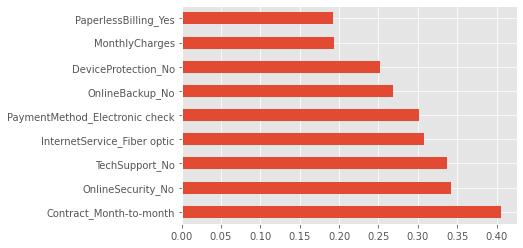

In [5]:
best_feat[1:10].plot(kind= 'barh')

We can see by the plot above, that some variables have might a positive relation to our target variable - Churn, while in plot below, some have negative relation. Positive relation meaning that the likeness of customer's churn increases by those vaiables, while in contrary, negative relation means that likeliness of churn decreases by that variable.

As mentioned in EDA, by having a one to two years contract along with tenure have the most negative relation with churn. Having DSL internet service also reduces the proability of churn. Lastly, total charges, monthly contracts, fiber optic internet services can lead to higher churn rates. This is interesting, although fiber optic services are actually faster, customers are likely to churn because of it.

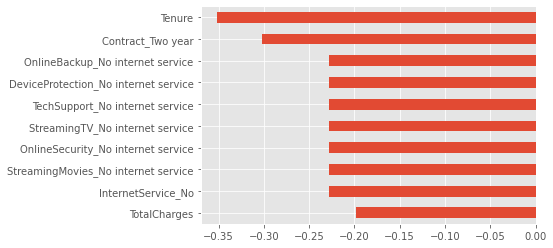

In [6]:
best_feat[-10:].plot(kind= 'barh')

In [7]:
df_new = df[['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 
             'OnlineBackup_No', 'DeviceProtection_No', 'MonthlyCharges', 'PaperlessBilling_Yes']]

In [8]:
df_new.head()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,MonthlyCharges,PaperlessBilling_Yes
0,0,1,1,1,0,1,0,1,0.115423,1
1,0,0,0,1,0,0,1,0,0.385075,0
2,1,1,0,1,0,0,0,1,0.354229,1
3,0,0,0,0,0,0,1,0,0.239303,0
4,1,1,1,1,1,1,1,1,0.521891,1


### MODELLING

In [9]:
# splitting target 

x = df_new.drop(columns = ['Churn'])
y = df_new['Churn'].values

In [10]:
# Split train data 80%

x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size = 0.8, shuffle = False)

# Model Best Parameter

LRG_best = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter = 1000).fit(x_train, y_train)

In [11]:
# Predict using Logistic Regression

yp_LRG = LRG_best.predict(x_test)

In [12]:
labels = ['Not Churned', 'Churned']

              precision    recall  f1-score   support

 Not Churned       0.83      0.89      0.86      1028
     Churned       0.63      0.52      0.57       381

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



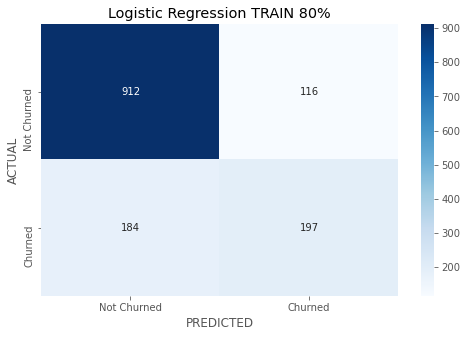

In [13]:
# Model evaluation

print(classification_report(y_test, yp_LRG, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, yp_LRG), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

It would seems that using these features / variables are causing a slight reduction on our recall of the churn customers. Therefore let's try to adding more variables, and see if the recall can be increased.

In [14]:
# adding Tenure, Contract two year, and No Internet service

df_new1 = df[['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 
              'OnlineBackup_No', 'DeviceProtection_No', 'MonthlyCharges', 'PaperlessBilling_Yes', 'Tenure', 'Contract_Two year', 'InternetService_No']]

In [28]:
df_new1.head()

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,MonthlyCharges,PaperlessBilling_Yes,Tenure,Contract_Two year,InternetService_No
0,0,1,1,1,0,1,0,1,0.115423,1,0.013889,0,0
1,0,0,0,1,0,0,1,0,0.385075,0,0.472222,0,0
2,1,1,0,1,0,0,0,1,0.354229,1,0.027778,0,0
3,0,0,0,0,0,0,1,0,0.239303,0,0.625000,0,0
4,1,1,1,1,1,1,1,1,0.521891,1,0.027778,0,0


In [16]:
# splitting target

x1 = df_new1.drop(columns = ['Churn'])
y1 = df_new1['Churn'].values

In [17]:
# Split train data 80%

x1_train, x1_test, y1_train, y1_test =  train_test_split(x1, y1, train_size = 0.8, shuffle = False)

# Model Best Parameter

LRG1_best = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter = 1000).fit(x1_train, y1_train)

In [18]:
# Predict using Logistic Regression
yp_LRG1 = LRG1_best.predict(x1_test)

              precision    recall  f1-score   support

 Not Churned       0.83      0.91      0.87      1028
     Churned       0.67      0.50      0.57       381

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



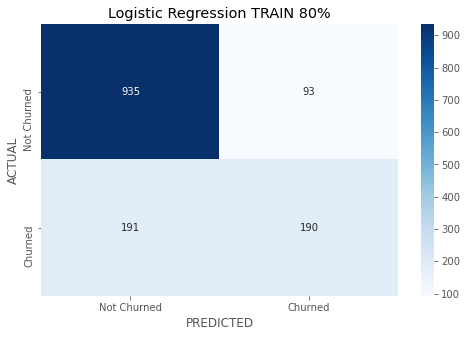

In [19]:
# Model evaluation

print(classification_report(y1_test, yp_LRG1, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y1_test, yp_LRG1), annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

So it would seems that the recall would be decreased if we add more features / variables into it. Therefore we will choose the previous one.

### SMOTE

In [90]:
# 

### MODEL DEPLOYMENT

In [79]:
model = LRG_best
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
df_new.columns

Index(['Churn', 'Contract_Month-to-month', 'OnlineSecurity_No',
       'TechSupport_No', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'OnlineBackup_No',
       'DeviceProtection_No', 'MonthlyCharges', 'PaperlessBilling_Yes'],
      dtype='object')

In [88]:
pd.DataFrame(df_new[:1])

,Churn,Contract_Month-to-month,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Electronic check,OnlineBackup_No,DeviceProtection_No,MonthlyCharges,PaperlessBilling_Yes
0,0,1,1,1,0,1,0,1,0.115423,1


In [128]:
model.predict_proba([[1,1,1,0,1,0,1,0.115423,1]])[0][1]

0.4651114181262545

In [118]:
df_ori = pd.read_csv('Telco-Customer-Churn-Clean.csv')

In [122]:
pipeline = make_pipeline(MinMaxScaler(), LRG_best)
model_original = pipeline.fit(x_train, y_train)